In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


Definition: OWD


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Both Neuro and Mus: 1562
Only Neuro: 632
Only Mus: 963
Neither Neuro nor Mus: 806
Dropping 99
(1619, 9)
Index(['Physical Health Days', 'Bio Sex', 'Bed Days', 'Disability',
       'Mental Health Days', 'both', 'neuro', 'neither', 'musculo'],
      dtype='object')
OWD Working Definition: Neuro vs Musculo vs Both vs Neither
best accuracy:  0.3057915057915058  best params:  {'k': 2, 'lambda': 1.0, 'random_state': 3}
test_accuracy:  (0.33641975308641975, 12.318936447137501)


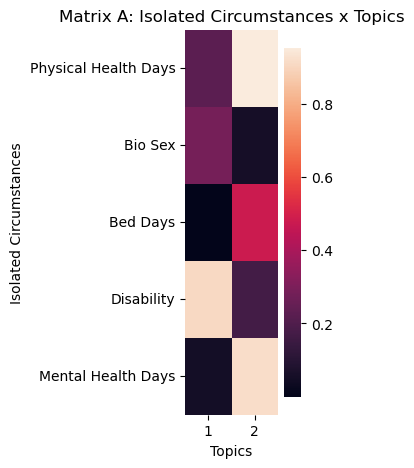

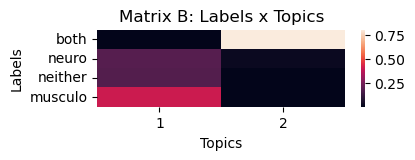

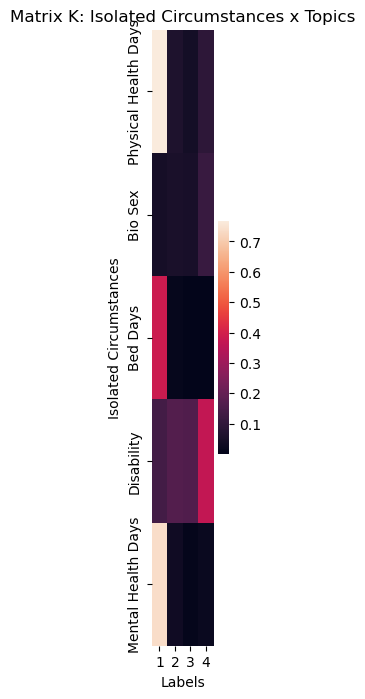

In [2]:
defn = DEF_OWD
print(f'Definition: {defn}')
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=defn, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': [2],'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                             get_topic_accu_distr=True, get_reconerr_distr=True)
print(f'{defn} Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = 'Isolated Circumstances'
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


Definition: CNS1


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(1619, 9)
Index(['Bio Sex', 'Mental Health Days', 'Disability', 'Bed Days',
       'Physical Health Days', 'neither', 'musculo', 'neuro', 'both'],
      dtype='object')
CNS1 Working Definition: Neuro vs Musculo vs Both vs Neither
best accuracy:  0.4571428571428572  best params:  {'k': 10, 'lambda': 0.0, 'random_state': 7}
test_accuracy:  0.5030864197530864


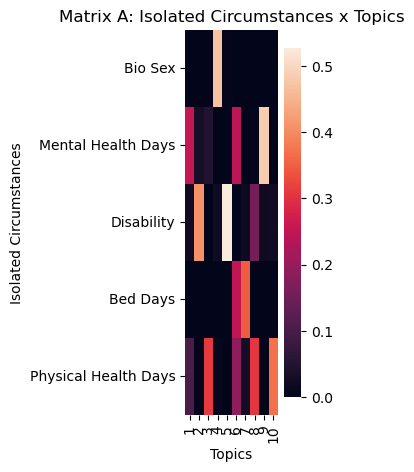

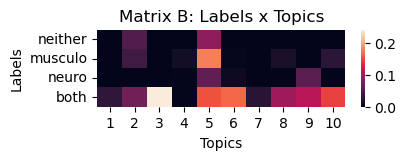

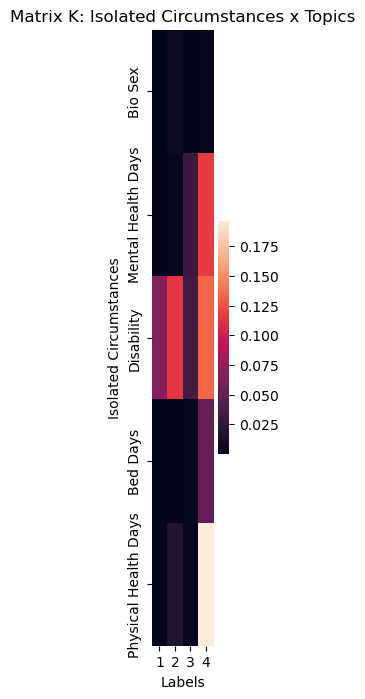

In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import needell_ssnmf
from needell_ssnmf import Needell_SSNMF

import display_ssnmf
from display_ssnmf import *

defn = DEF_CNS1
print(f'Definition: {defn}')
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=defn, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Needell_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': [10],'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                             get_topic_accu_distr=True, get_reconerr_distr=True)
print(f'{defn} Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = 'Isolated Circumstances'
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


In [1]:
defn = DEF_CNS2
print(f'Definition: {defn}')
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=defn, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': [2],'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                             get_topic_accu_distr=True, get_reconerr_distr=True)
print(f'{defn} Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = {'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


NameError: name 'DEF_CNS2' is not defined

In [ ]:
defn = DEF_CNS3
print(f'Definition: {defn}')
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=defn, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': [2],'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                             get_topic_accu_distr=True, get_reconerr_distr=True)
print(f'{defn} Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = {'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


In [ ]:
defn = DEF_PNS1
print(f'Definition: {defn}')
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=defn, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': [2],'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                             get_topic_accu_distr=True, get_reconerr_distr=True)
print(f'{defn} Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = {'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


In [ ]:
defn = DEF_PNS2
print(f'Definition: {defn}')
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=defn, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': [2],'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                             get_topic_accu_distr=True, get_reconerr_distr=True)
print(f'{defn} Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = {'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)


In [ ]:
defn = DEF_PNS3
print(f'Definition: {defn}')
data = LymeData({CHRONIC, NEURO, MUSCULO},{ADDL_CIR},{NEURO, MUSCULO, BOTH, NEITHER}, individual_cols={'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}, defn=defn, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr, Xreconerr_distr, Yreconerr_distr, Xtestreconerr_distr = ssnmf.gridsearch(param_range={'k': [2],'lambda': list(np.linspace(0,1,10)), 'random_state': range(0,10)},
                                             get_topic_accu_distr=True, get_reconerr_distr=True)
print(f'{defn} Working Definition: Neuro vs Musculo vs Both vs Neither')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = {'Bio Sex','Bed Days',
   'Mental Health Days', 'Physical Health Days', 'Disability'}
labels = [x for x in data.df.columns if x not in [NEURO, MUSCULO, BOTH, NEITHER]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)
